---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 7

---

Please write your full name here
- **Name** : "Mourad Magdy"

# Part 1 Clustering

In this part of the assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [18]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [19]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

## Question 0
Set random seed to 100

In [20]:
np.random.seed(0)

## Question 1
Scatter plot the dataset

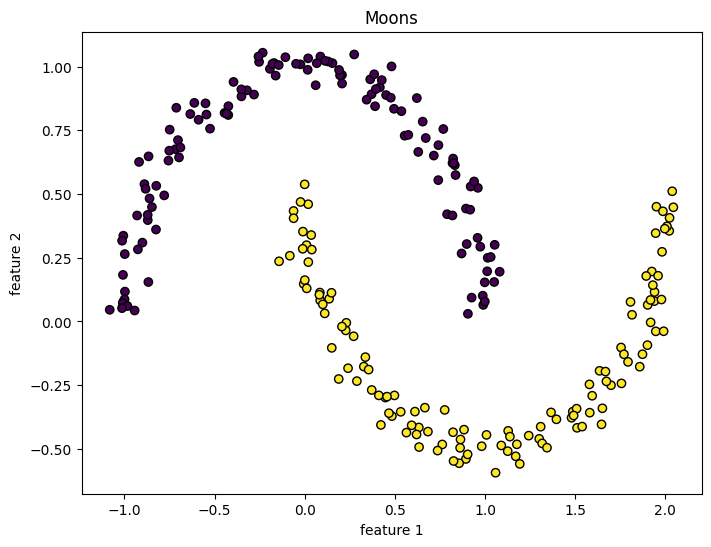

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',marker='o',edgecolors='k')
plt.title("Moons")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

## Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

**ANSWER:**

It will not perform well because the clusters are not linear, they aren't seperable by linear boundaries.

## Question 3
1. Use Elbow method to find best "k". (Use inertia as metric). Use a range of K from the 1 to 15
2. Plot the elbow graph.
3. Train SKlearn KMeans model using the **best k** you found.
4. Scatter plot the results and **color** the clusters

**NOTE**

If you get a memory leak warning, please follow the following link: https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [22]:
from sklearn.cluster import KMeans
inertia=[]
for k in range(1,16):
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

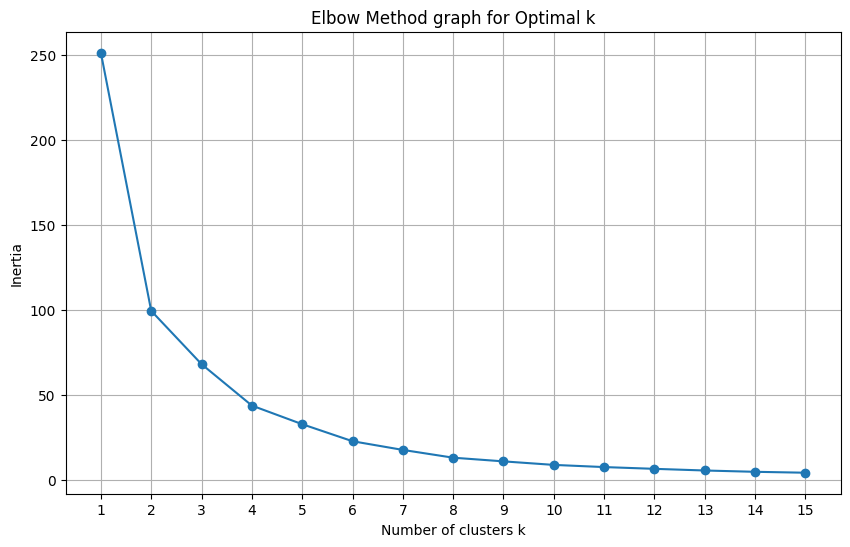

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,16), inertia, marker='o', linestyle='-')
plt.title('Elbow Method graph for Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 16, step=1))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


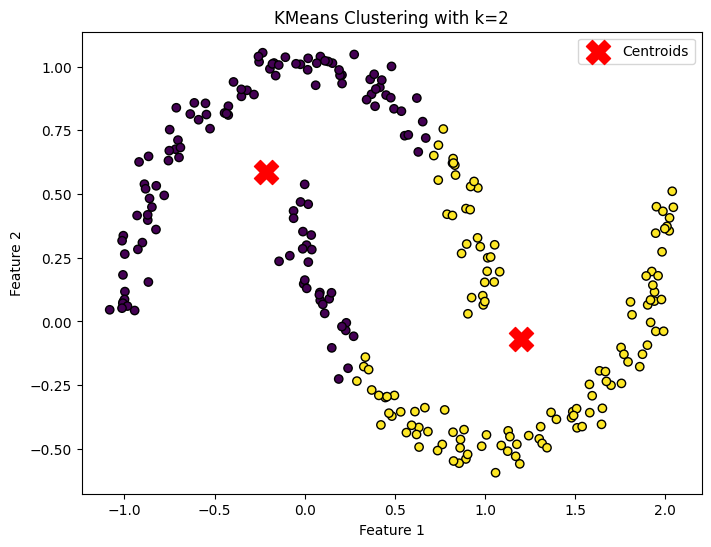

In [24]:
best_k=2
best_kmeans=KMeans(n_clusters=best_k,random_state=0)
best_kmeans.fit(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_kmeans.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering with k={}'.format(best_k))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Question 4

- Try DBSCAN algorithm on the same data with the appropriate `eps` parameter value
- Scatter plot the results and color the clusters

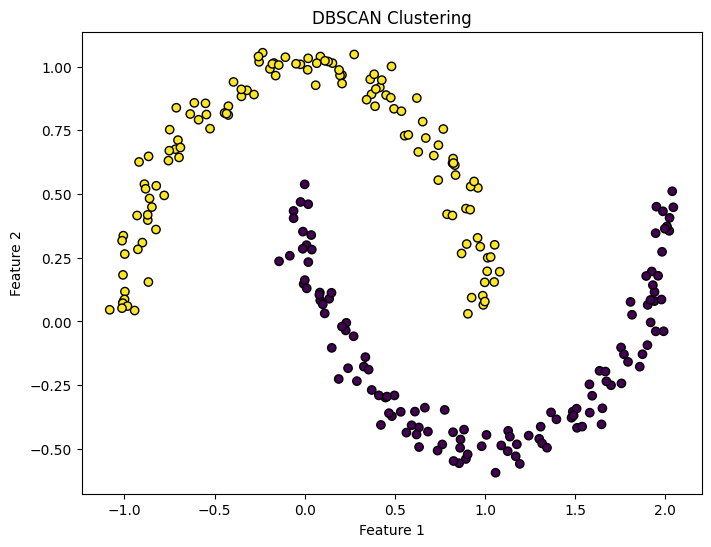

In [25]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=5)
dbscan.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 5
**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

**ANSWER:**

- Kmeans:- could not separate the two features completely because it is not suited for complex shapes
- DBSCAN:- could separate the two features completely becaise it is well suited for datasets with complex shapes.

## Question 6
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

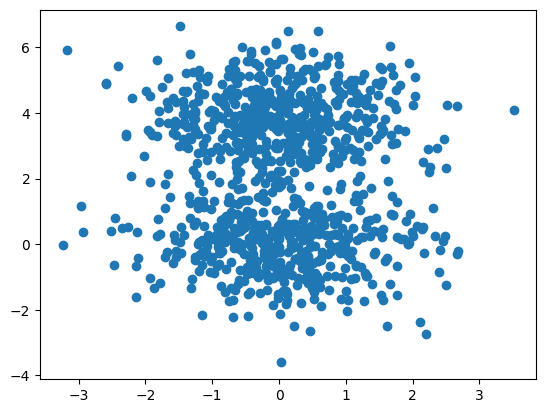

In [26]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500)+4, rng.standard_normal(500)])
plt.scatter(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


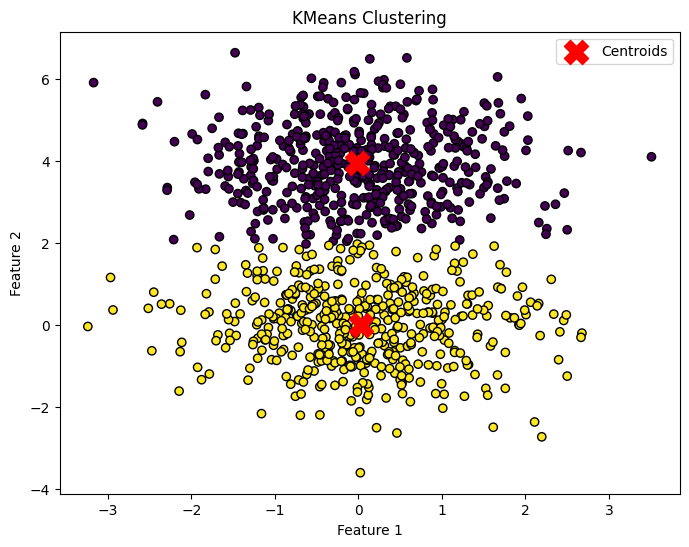

In [27]:
k_means_new_dataset=KMeans(n_clusters=2,random_state=100)
features=np.column_stack((x,y))
k_means_new_dataset.fit(features)
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=k_means_new_dataset.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(k_means_new_dataset.cluster_centers_[:, 0], k_means_new_dataset.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Question 7
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

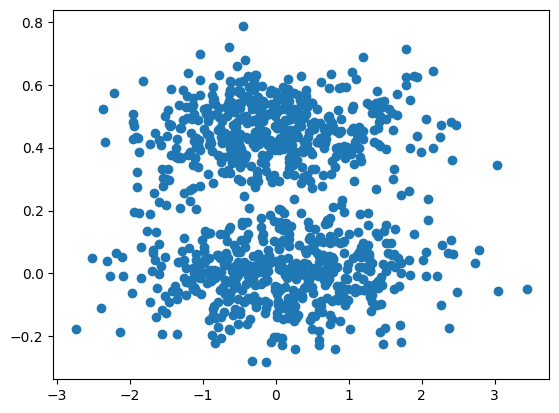

In [28]:
np.random.seed(100)
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(500) + 4.5, rng.standard_normal(500)]) / 10
plt.scatter(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


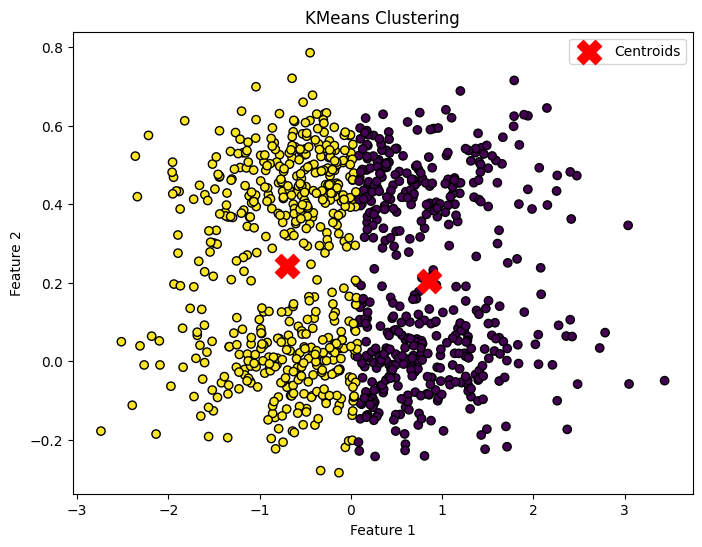

In [29]:
kmeans2_new_dataset=KMeans(n_clusters=2,random_state=100)
features2=np.column_stack((x,y))
kmeans2_new_dataset.fit(features2)
plt.figure(figsize=(8, 6))
plt.scatter(features2[:, 0], features2[:, 1], c=kmeans2_new_dataset.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans2_new_dataset.cluster_centers_[:, 0], kmeans2_new_dataset.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



## Question 8
Why did kmeans fail to cluster the data in question 7 but succeeded in question 6?

**ANSWER**:

The scaling of the data in question 7 contributed to the failure of kmeans since the y features is scaled down so it became much smaller compared to x, so this can affect how kmeans assigns points to clusters

## Question 9

- Find a way to make kmeans succeed on the data and plot the results



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


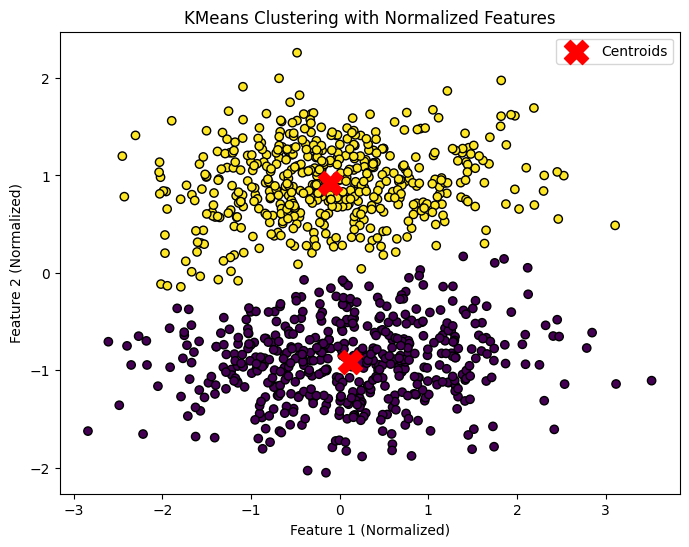

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_normalized=scaler.fit_transform(features2)
kmeans_normalized=KMeans(n_clusters=2,random_state=100)
kmeans_normalized.fit(features_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(features_normalized[:, 0], features_normalized[:, 1], c=kmeans_normalized.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans_normalized.cluster_centers_[:, 0], kmeans_normalized.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering with Normalized Features')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.legend()
plt.show()

## Question 10
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm showing the color of the clusters

In [31]:
def create_dataset(plot_original = False):
    np.random.seed(100)
    x = np.random.normal(0, 1, 500)
    y = np.random.normal(0, 1, 500)
    X_1 = np.vstack((x, y)).T

    x = np.random.normal(6, 1, 500)
    X_2 = np.vstack((x, y)).T

    X = np.vstack((X_1, X_2))
    if plot_original:
        plt.scatter(X[:, 0], X[:, 1])
        plt.title('Generated Data')
        plt.axis('equal');
    # Scaling matrix
    sx, sy = 0.7, 3.4
    Scale = np.array([[sx, 0], [0, sy]])

    # Rotation matrix
    theta = 0.77*np.pi
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array([[c, -s], [s, c]])

    # Transformation matrix
    T = Scale.dot(Rot)
    X_t = X - np.array([3,0])
    X_t = X_t.dot(T)
    return X_t

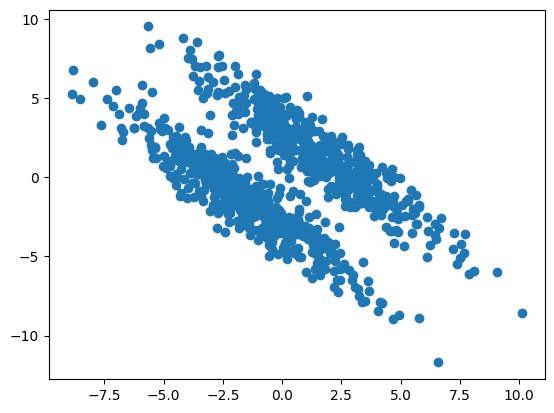

In [32]:
X = create_dataset()
plt.scatter(X[:,0],X[:,1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


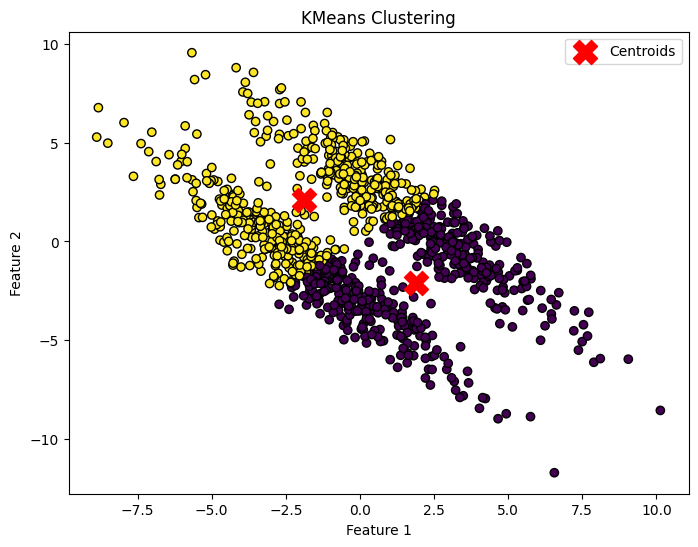

In [33]:
kmeans3_new_dataset=KMeans(n_clusters=2,random_state=100)
kmeans3_new_dataset.fit(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans3_new_dataset.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans3_new_dataset.cluster_centers_[:, 0], kmeans3_new_dataset.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Question 11
Why did kmeans fail to cluster the data in question 10 but succeeded in question 6?

**ANSWER**:

It failed because the dataset elongated and not spherical(spread out in a certain direction) so it does not perform well unlike the dataset in question 6

## Question 12

1. Read the following blog -[link](https://janakiev.com/blog/covariance-matrix/#:~:text=Linear%20Transformations%20of%20the%20Data%20Set,-Next%20we%20will&text=which%20means%20that%20we%20can,transformed%20by%20Y%3DSX)-
2. Calculate a transformation that you can apply to the data to make kmeans succeed !!!
3. Plot the transformed data
4. Plot the kmeans result on the **ORIGINAL** data


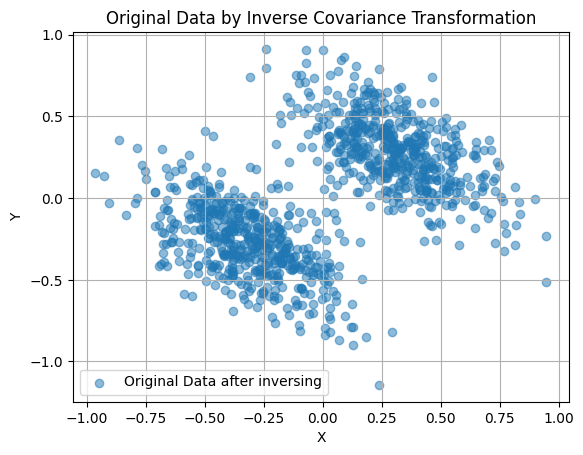

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Y')

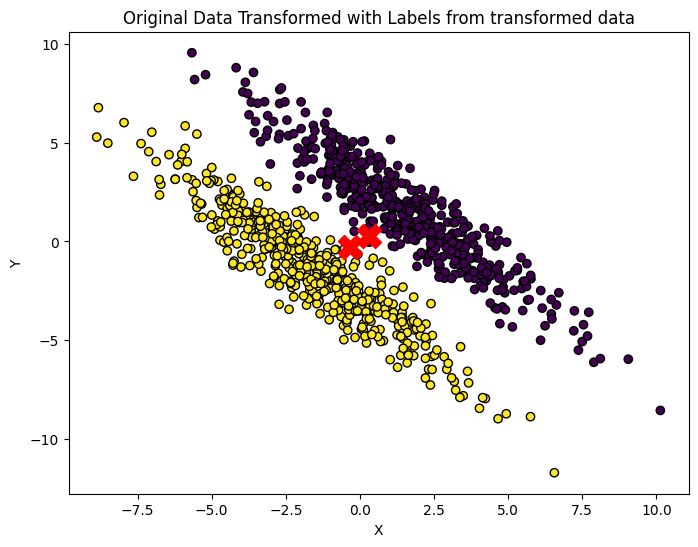

In [44]:
X=create_dataset()
covariance_matrix = np.cov(X.T)
inv_covariance_matrix = np.linalg.inv(covariance_matrix)
X_inverse = X.dot(inv_covariance_matrix)

plt.scatter(X_inverse[:, 0], X_inverse[:, 1], label='Original Data after inversing', alpha=0.5)
plt.title('Original Data by Inverse Covariance Transformation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_inverse)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Original Data Transformed with Labels from transformed data')
plt.xlabel('X')
plt.ylabel('Y')


# Part 2 PCA

In [35]:
from matplotlib.colors import ListedColormap


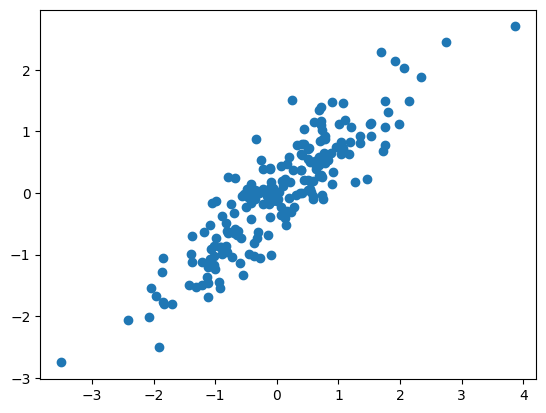

In [36]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [37]:
#### YOUR FUNCTION
def pca(X):
    X_centered=X-np.mean(X,axis=0)
    covariance_matrix=np.cov(X_centered,rowvar=False)
    eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
    sorted_eigenvectors=eigen_vectors[:,np.argsort(eigen_values)[::-1]]
    sorted_eigenvalue=eigen_values[np.argsort(eigen_values)[::-1]]

    X_reduced=np.dot(X_centered,sorted_eigenvectors)



    return sorted_eigenvectors, sorted_eigenvalue, X_reduced

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA eigenvectors over the ORIGINAL data with the correct directions!

In [38]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalue, X_transformed = pca(X)

In [39]:
print("Eigenvalues are: ",sorted_eigenvalue )

Eigenvalues are:  [1.82927343 0.10246373]


(-4.931196610019512, 5.101064178684794, -0.877141003189056, 1.0633000859399695)

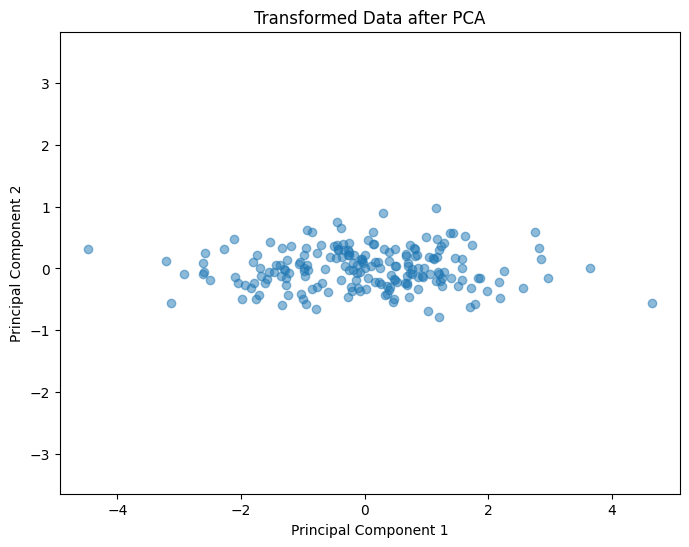

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5)
plt.title('Transformed Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis('equal')

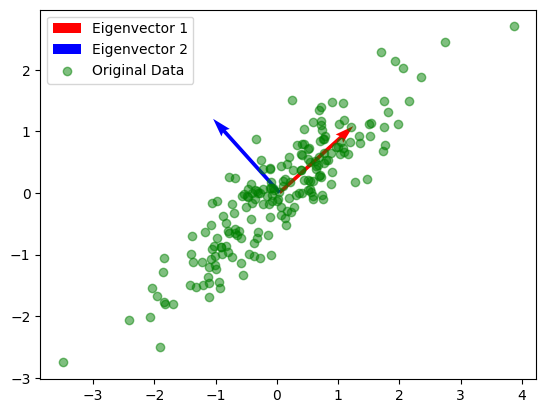

In [41]:
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), sorted_eigenvectors[0, 0], sorted_eigenvectors[1, 0], scale=5, color='red', label='Eigenvector 1')
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), sorted_eigenvectors[0, 1], sorted_eigenvectors[1, 1], scale=5, color='blue', label='Eigenvector 2')
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color='green', label='Original Data')
plt.legend()
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

PCA Eigenvalues:  [1.82927343 0.10246373]


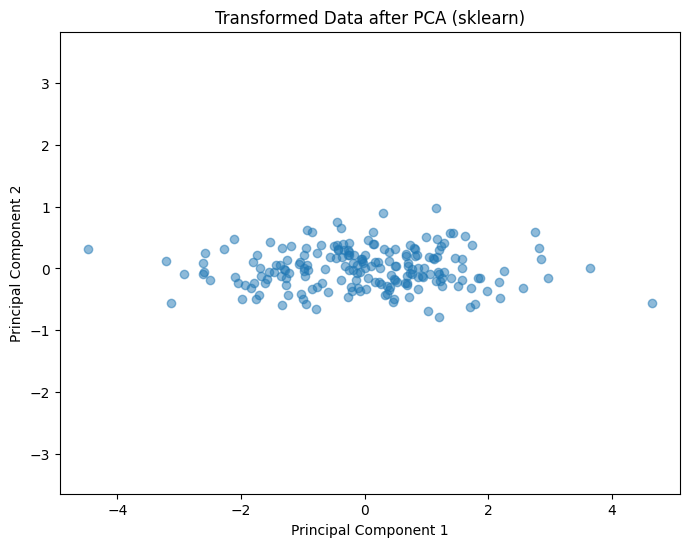

In [42]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
print("PCA Eigenvalues: ",pca.explained_variance_)
X_pca = pca.transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Transformed Data after PCA (sklearn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis('equal')
plt.show()
